In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer

In [2]:
df=pd.read_csv('adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
df.duplicated().sum()

24

In [7]:
df1=df.drop_duplicates()
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df1  ##After removing the duplicates value.

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df1.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.shape

(32561, 15)

In [11]:
df1.shape

(32537, 15)

In [12]:
df.skew()

C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_4952\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age                0.558743
fnlwgt             1.446980
education_num     -0.311676
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
dtype: float64

In [13]:
df.kurt()

C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_4952\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


age                -0.166127
fnlwgt              6.218811
education_num       0.623444
capital_gain      154.799438
capital_loss       20.376802
hours_per_week      2.916687
dtype: float64

In [14]:
std_sca=StandardScaler()
min_sca=MinMaxScaler()
rob_sca=RobustScaler()
norm=Normalizer()

In [20]:
df1['standard fnlwgt']=std_sca.fit_transform(df1[['fnlwgt']])

C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_4952\3976114859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['standard fnlwgt']=std_sca.fit_transform(df1[['fnlwgt']])


In [21]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,standard fnlwgt
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,-1.063569
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,-1.008668
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.245040
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.425752
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1.408066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0.639678
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,-0.335436
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,-0.358779
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0.110930


In [25]:
df1['minmax fnlwgt']=min_sca.fit_transform(df1[['fnlwgt']])

C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_4952\143825121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['minmax fnlwgt']=min_sca.fit_transform(df1[['fnlwgt']])


In [26]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,standard fnlwgt,minmax fnlwgt
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,-1.063569,0.044302
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,-1.008668,0.048238
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.245040,0.138113
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.425752,0.151068
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1.408066,0.221488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0.639678,0.166404
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,-0.335436,0.096500
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,-0.358779,0.094827
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0.110930,0.128499


In [27]:
df1['robust fnlwgt']=rob_sca.fit_transform(df1[['fnlwgt']])

C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_4952\1922826864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['robust fnlwgt']=rob_sca.fit_transform(df1[['fnlwgt']])


In [28]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,standard fnlwgt,minmax fnlwgt,robust fnlwgt
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,-1.063569,0.044302,-0.846215
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,-1.008668,0.048238,-0.797585
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.245040,0.138113,0.312925
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.425752,0.151068,0.472996
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1.408066,0.221488,1.343110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0.639678,0.166404,0.662488
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,-0.335436,0.096500,-0.201249
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,-0.358779,0.094827,-0.221926
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0.110930,0.128499,0.194133


In [29]:
df1['normlizer']=norm.fit_transform(df1[['fnlwgt']])

C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_4952\3718631369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['normlizer']=norm.fit_transform(df1[['fnlwgt']])


In [30]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,standard fnlwgt,minmax fnlwgt,robust fnlwgt,normlizer
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,-1.063569,0.044302,-0.846215,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,-1.008668,0.048238,-0.797585,1.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.245040,0.138113,0.312925,1.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.425752,0.151068,0.472996,1.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1.408066,0.221488,1.343110,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0.639678,0.166404,0.662488,1.0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,-0.335436,0.096500,-0.201249,1.0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,-0.358779,0.094827,-0.221926,1.0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0.110930,0.128499,0.194133,1.0


# Labeling for the education column:

In [31]:
##Use of label encoder in eda process:

In [39]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,standard fnlwgt,minmax fnlwgt,robust fnlwgt,normlizer
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,-1.063569,0.044302,-0.846215,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,-1.008668,0.048238,-0.797585,1.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.245040,0.138113,0.312925,1.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.425752,0.151068,0.472996,1.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1.408066,0.221488,1.343110,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0.639678,0.166404,0.662488,1.0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,-0.335436,0.096500,-0.201249,1.0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,-0.358779,0.094827,-0.221926,1.0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0.110930,0.128499,0.194133,1.0


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
lab_enc=LabelEncoder()

In [34]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [40]:
df1['education']=lab_enc.fit_transform(df1[['education']])

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_4952\4040543962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['education']=lab_enc.fit_transform(df1[['education']])


In [41]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,standard fnlwgt,minmax fnlwgt,robust fnlwgt,normlizer
0,39,State-gov,77516,9,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,-1.063569,0.044302,-0.846215,1.0
1,50,Self-emp-not-inc,83311,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,-1.008668,0.048238,-0.797585,1.0
2,38,Private,215646,11,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.245040,0.138113,0.312925,1.0
3,53,Private,234721,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.425752,0.151068,0.472996,1.0
4,28,Private,338409,9,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1.408066,0.221488,1.343110,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,7,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0.639678,0.166404,0.662488,1.0
32557,40,Private,154374,11,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,-0.335436,0.096500,-0.201249,1.0
32558,58,Private,151910,11,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,-0.358779,0.094827,-0.221926,1.0
32559,22,Private,201490,11,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0.110930,0.128499,0.194133,1.0


In [42]:
lab_enc.classes_

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

# Labelling for the occupation column:

In [43]:
df1['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [44]:
lab_enc=LabelEncoder()

In [45]:
df1['occupation']=lab_enc.fit_transform(df1[['occupation']])

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_4952\1687971341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['occupation']=lab_enc.fit_transform(df1[['occupation']])


In [46]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,standard fnlwgt,minmax fnlwgt,robust fnlwgt,normlizer
0,39,State-gov,77516,9,13,Never-married,1,Not-in-family,White,Male,2174,0,40,United-States,<=50K,-1.063569,0.044302,-0.846215,1.0
1,50,Self-emp-not-inc,83311,9,13,Married-civ-spouse,4,Husband,White,Male,0,0,13,United-States,<=50K,-1.008668,0.048238,-0.797585,1.0
2,38,Private,215646,11,9,Divorced,6,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.245040,0.138113,0.312925,1.0
3,53,Private,234721,1,7,Married-civ-spouse,6,Husband,Black,Male,0,0,40,United-States,<=50K,0.425752,0.151068,0.472996,1.0
4,28,Private,338409,9,13,Married-civ-spouse,10,Wife,Black,Female,0,0,40,Cuba,<=50K,1.408066,0.221488,1.343110,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,7,12,Married-civ-spouse,13,Wife,White,Female,0,0,38,United-States,<=50K,0.639678,0.166404,0.662488,1.0
32557,40,Private,154374,11,9,Married-civ-spouse,7,Husband,White,Male,0,0,40,United-States,>50K,-0.335436,0.096500,-0.201249,1.0
32558,58,Private,151910,11,9,Widowed,1,Unmarried,White,Female,0,0,40,United-States,<=50K,-0.358779,0.094827,-0.221926,1.0
32559,22,Private,201490,11,9,Never-married,1,Own-child,White,Male,0,0,20,United-States,<=50K,0.110930,0.128499,0.194133,1.0


In [47]:
lab_enc.classes_

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

# Outliers:

<AxesSubplot:>

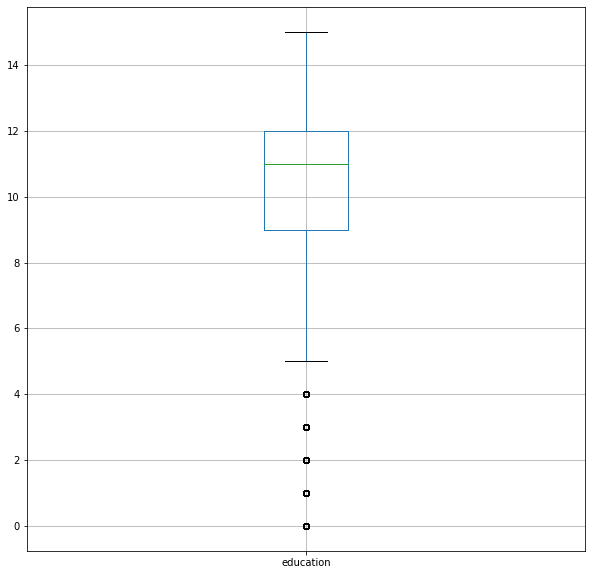

In [49]:
df1.boxplot('education',figsize=(10,10))

<AxesSubplot:>

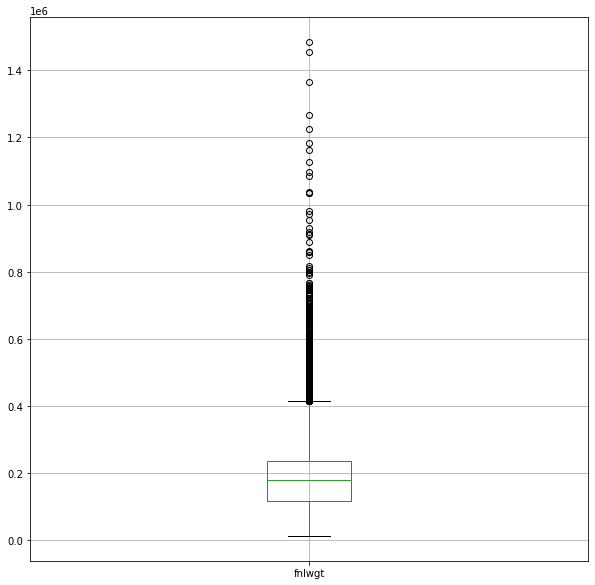

In [51]:
df1.boxplot('fnlwgt',figsize=(10,10))

<AxesSubplot:>

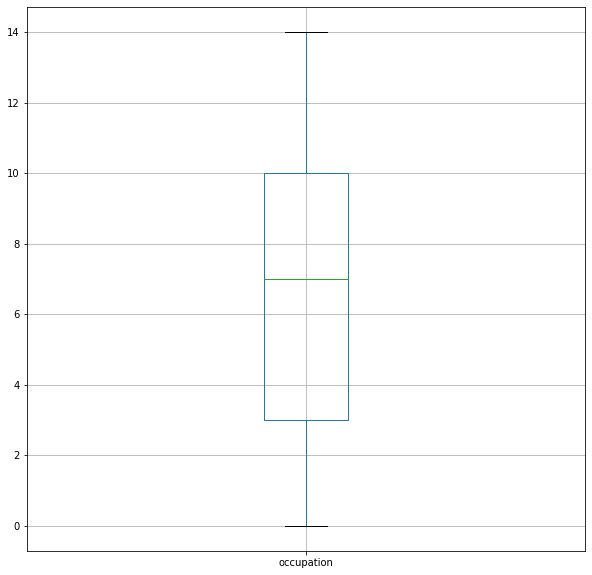

In [52]:
df1.boxplot('occupation',figsize=(10,10))

# Removing outliers for fnlwgt column:

In [56]:
median=df['fnlwgt'].median()
median

178356.0

In [57]:
Q1=df['fnlwgt'].quantile(0.25)
Q1

117827.0

In [58]:
Q3=df['fnlwgt'].quantile(0.75)
Q3

237051.0

In [69]:
IQR=Q3-Q1
IQR

119224.0

In [70]:
lower=Q1-1.5*IQR
lower

-61009.0

In [71]:
upper=Q3+1.5*IQR
upper

415887.0

<AxesSubplot:>

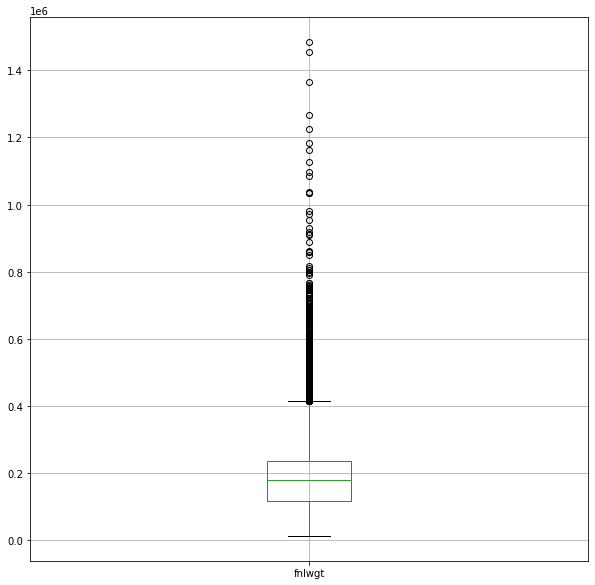

In [72]:
df1.boxplot('fnlwgt',figsize=(10,10))

In [73]:
outliers=df1[(df1.fnlwgt<lower) | (df1.fnlwgt>upper)]
outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,standard fnlwgt,minmax fnlwgt,robust fnlwgt,normlizer
37,19,Private,544091,11,9,Married-AF-spouse,1,Wife,White,Female,0,0,25,United-States,<=50K,3.356645,0.361178,3.069122,1.0
40,31,Private,507875,6,5,Married-civ-spouse,7,Husband,White,Male,0,0,43,United-States,<=50K,3.013544,0.336582,2.765210,1.0
80,18,Private,446839,11,9,Never-married,12,Not-in-family,White,Male,0,0,30,United-States,<=50K,2.435304,0.295129,2.253017,1.0
110,24,Private,432376,9,13,Never-married,12,Other-relative,White,Male,0,0,40,United-States,<=50K,2.298285,0.285307,2.131648,1.0
157,71,Self-emp-not-inc,494223,15,10,Separated,12,Unmarried,Black,Male,0,1816,2,United-States,<=50K,2.884208,0.327310,2.650647,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32306,24,Private,427686,3,2,Married-civ-spouse,6,Other-relative,White,Male,0,0,40,Mexico,<=50K,2.253853,0.282121,2.092291,1.0
32329,28,Private,435842,9,13,Married-civ-spouse,4,Husband,White,Male,0,0,40,United-States,<=50K,2.331121,0.287660,2.160734,1.0
32470,50,Private,485710,10,16,Divorced,10,Not-in-family,White,Female,0,0,50,United-States,<=50K,2.803558,0.321529,2.579209,1.0
32496,18,Private,436163,1,7,Never-married,10,Own-child,White,Male,0,0,20,United-States,<=50K,2.334162,0.287878,2.163427,1.0


In [74]:
rem_outliers=df1[(df1.fnlwgt>lower) | (df1.fnlwgt<upper)]
rem_outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,standard fnlwgt,minmax fnlwgt,robust fnlwgt,normlizer
0,39,State-gov,77516,9,13,Never-married,1,Not-in-family,White,Male,2174,0,40,United-States,<=50K,-1.063569,0.044302,-0.846215,1.0
1,50,Self-emp-not-inc,83311,9,13,Married-civ-spouse,4,Husband,White,Male,0,0,13,United-States,<=50K,-1.008668,0.048238,-0.797585,1.0
2,38,Private,215646,11,9,Divorced,6,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.245040,0.138113,0.312925,1.0
3,53,Private,234721,1,7,Married-civ-spouse,6,Husband,Black,Male,0,0,40,United-States,<=50K,0.425752,0.151068,0.472996,1.0
4,28,Private,338409,9,13,Married-civ-spouse,10,Wife,Black,Female,0,0,40,Cuba,<=50K,1.408066,0.221488,1.343110,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,7,12,Married-civ-spouse,13,Wife,White,Female,0,0,38,United-States,<=50K,0.639678,0.166404,0.662488,1.0
32557,40,Private,154374,11,9,Married-civ-spouse,7,Husband,White,Male,0,0,40,United-States,>50K,-0.335436,0.096500,-0.201249,1.0
32558,58,Private,151910,11,9,Widowed,1,Unmarried,White,Female,0,0,40,United-States,<=50K,-0.358779,0.094827,-0.221926,1.0
32559,22,Private,201490,11,9,Never-married,1,Own-child,White,Male,0,0,20,United-States,<=50K,0.110930,0.128499,0.194133,1.0


# Removing outliers for education column:

<AxesSubplot:>

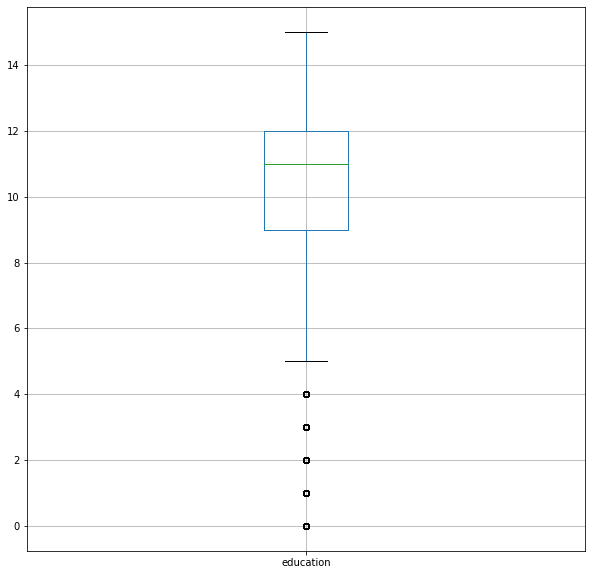

In [76]:
df1.boxplot('education',figsize=(10,10))

In [77]:
Q1=df1['education'].quantile(0.25)
Q1

9.0

In [78]:
Q3=df1['education'].quantile(0.75)
Q3

12.0

In [79]:
IQR=Q3-Q1
IQR

3.0

In [80]:
lower=Q1-1.5*IQR
lower

4.5

In [81]:
upper=Q3+1.5*IQR
upper

16.5

In [82]:
outliers=df1[(df1.education<lower) | (df1.education>upper)]
outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,standard fnlwgt,minmax fnlwgt,robust fnlwgt,normlizer
3,53,Private,234721,1,7,Married-civ-spouse,6,Husband,Black,Male,0,0,40,United-States,<=50K,0.425752,0.151068,0.472996,1.0
18,38,Private,28887,1,7,Married-civ-spouse,12,Husband,White,Male,0,0,50,United-States,<=50K,-1.524268,0.011275,-1.254292,1.0
23,43,Private,117037,1,7,Married-civ-spouse,14,Husband,White,Male,0,2042,40,United-States,<=50K,-0.689157,0.071143,-0.514568,1.0
35,48,Private,242406,1,7,Never-married,7,Unmarried,White,Male,0,0,40,Puerto-Rico,<=50K,0.498557,0.156288,0.537486,1.0
56,46,Private,216666,4,3,Married-civ-spouse,7,Husband,White,Male,0,0,40,Mexico,<=50K,0.254703,0.138806,0.321484,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32515,66,Federal-gov,47358,0,6,Married-civ-spouse,3,Husband,White,Male,3471,0,40,United-States,<=50K,-1.349278,0.023820,-1.099290,1.0
32522,58,Private,147707,1,7,Married-civ-spouse,12,Husband,White,Male,0,0,40,United-States,<=50K,-0.398597,0.091972,-0.257196,1.0
32526,32,Private,211349,0,6,Married-civ-spouse,14,Husband,White,Male,0,0,40,United-States,<=50K,0.204331,0.135195,0.276866,1.0
32535,22,Private,325033,2,8,Never-married,11,Own-child,Black,Male,0,0,35,United-States,<=50K,1.281345,0.212404,1.230863,1.0


In [83]:
rem_outliers=df1[(df1.education>lower) | (df1.education<upper)]
rem_outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,standard fnlwgt,minmax fnlwgt,robust fnlwgt,normlizer
0,39,State-gov,77516,9,13,Never-married,1,Not-in-family,White,Male,2174,0,40,United-States,<=50K,-1.063569,0.044302,-0.846215,1.0
1,50,Self-emp-not-inc,83311,9,13,Married-civ-spouse,4,Husband,White,Male,0,0,13,United-States,<=50K,-1.008668,0.048238,-0.797585,1.0
2,38,Private,215646,11,9,Divorced,6,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.245040,0.138113,0.312925,1.0
3,53,Private,234721,1,7,Married-civ-spouse,6,Husband,Black,Male,0,0,40,United-States,<=50K,0.425752,0.151068,0.472996,1.0
4,28,Private,338409,9,13,Married-civ-spouse,10,Wife,Black,Female,0,0,40,Cuba,<=50K,1.408066,0.221488,1.343110,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,7,12,Married-civ-spouse,13,Wife,White,Female,0,0,38,United-States,<=50K,0.639678,0.166404,0.662488,1.0
32557,40,Private,154374,11,9,Married-civ-spouse,7,Husband,White,Male,0,0,40,United-States,>50K,-0.335436,0.096500,-0.201249,1.0
32558,58,Private,151910,11,9,Widowed,1,Unmarried,White,Female,0,0,40,United-States,<=50K,-0.358779,0.094827,-0.221926,1.0
32559,22,Private,201490,11,9,Never-married,1,Own-child,White,Male,0,0,20,United-States,<=50K,0.110930,0.128499,0.194133,1.0
